In [1]:
import yt
import numpy as np
import json

In [2]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fname = "snap_000_n1.hdf5"
unit_base = {'UnitLength_in_cm'         : 3.08568e+21,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = 1e5   # kpc
bbox = [[-bbox_lim,bbox_lim],
        [-bbox_lim,bbox_lim],
        [-bbox_lim,bbox_lim]]  # limits

ds = yt.load(fname,unit_base=unit_base,bounding_box=bbox)
ds.index
ad= ds.all_data()

sp0 = ds.sphere('max',(1000,"kpc"))
rp0 = yt.create_profile(sp0, 'radius', ('gas', 'kT'),
                        units = {'radius': 'kpc'},
                        logs = {'radius': False})

yt : [INFO     ] 2017-11-23 20:20:53,008 Calculating time from 0.000e+00 to be 4.250e+17 seconds
yt : [INFO     ] 2017-11-23 20:20:53,021 Parameters: current_time              = 4.249860691601936e+17 s
yt : [INFO     ] 2017-11-23 20:20:53,022 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-11-23 20:20:53,023 Parameters: domain_left_edge          = [-100000. -100000. -100000.]
yt : [INFO     ] 2017-11-23 20:20:53,024 Parameters: domain_right_edge         = [ 100000.  100000.  100000.]
yt : [INFO     ] 2017-11-23 20:20:53,025 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-11-23 20:20:53,026 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-11-23 20:20:53,026 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2017-11-23 20:20:53,027 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2017-11-23 20:20:53,027 Parameters: hubble_constant           = 0.7
yt : [INFO     ] 2017-11-23 20:20:53,030 Allocating for 4.000e+05 

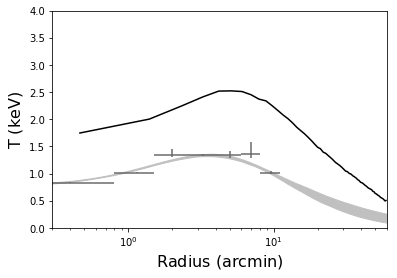

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

data = np.loadtxt('temp_s2_obs.txt')
X = data[:,0]
Y = data[:,3]

file = open("s10_plt.json")
a = json.load(file)
b = np.array(a["temperature_model"])

ax.plot(rp0.x.value/16.8, rp0["kT"].in_units("keV").value,'black')
ax.errorbar(X,Y,xerr=abs(data[:,1:3].T),yerr=abs(data[:,4:].T),color='dimgray',linestyle='none')
x_array = np.array(range(4999))
x_array = x_array / 16.8
plt.fill_between(x_array,b[1],b[2],color='silver')

ax.set_xlabel(r"$\mathrm{Radius\ (arcmin)}$", fontsize=16)
ax.set_ylabel(r"$\mathrm{T\ (keV)}$", fontsize=16)
ax.set_xscale('log')
ax.set_xlim(0.3,60)
ax.set_ylim(0,4)

plt.show()